<tr>
<td style="text-align: center;">
    <div style="display: inline-block;text-align: center">
        <img src="Logo_CentraleSupélec.png" style="width: 30%;">
        <img src="Logo-HeadMind-Partners.png" style="width: 50%;">
    </div>
</td>
</tr>


<h1 style="font-family: Georgia, Arial; font-size: 36px;">Integration of all POC</h1>
<p style="font-size: 24px;">Infonum Project</p>
<p style="font-size: 24px;"></p>
<p style="font-size: 24px;">Members: Francisco García, Olivia Moyal, Ibrahim Ramdane</p>


In [17]:
from embedding_reference import WikipediaAPI
from getting_the_news import NewsFetcher
from news_treatment import TextProcessor
from news_analysis import NewsAnalyzer


In [11]:
import pandas as pd
from datetime import datetime

In [5]:
enterprise = "Apple Inc."
max_chars = 2400

apple_reference = WikipediaAPI(enterprise, max_chars)
print(apple_reference.reference)

# embedding = apple_reference.embedding_of_text()
# print(embedding)

Apple Inc. (formerly Apple Computer, Inc.) is an American multinational corporation and technology company headquartered in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer software, and online services. Devices include the iPhone, iPad, Mac, Apple Watch, Vision Pro, and Apple TV; operating systems include iOS, iPadOS, and macOS; and software applications and services include iTunes, iCloud, Apple Music, and Apple TV+.
For most of 2011 to 2024, Apple became the world's largest company by market capitalization until Microsoft assumed the position in January 2024. In 2022, Apple was the largest technology company by revenue, with US$394.3 billion. As of 2023, Apple was the fourth-largest personal computer vendor by unit sales, the largest manufacturing company by revenue, and the largest vendor of mobile phones in the world. It is one of the Big Five American information technology companies, alongside Alphabet (the parent company o

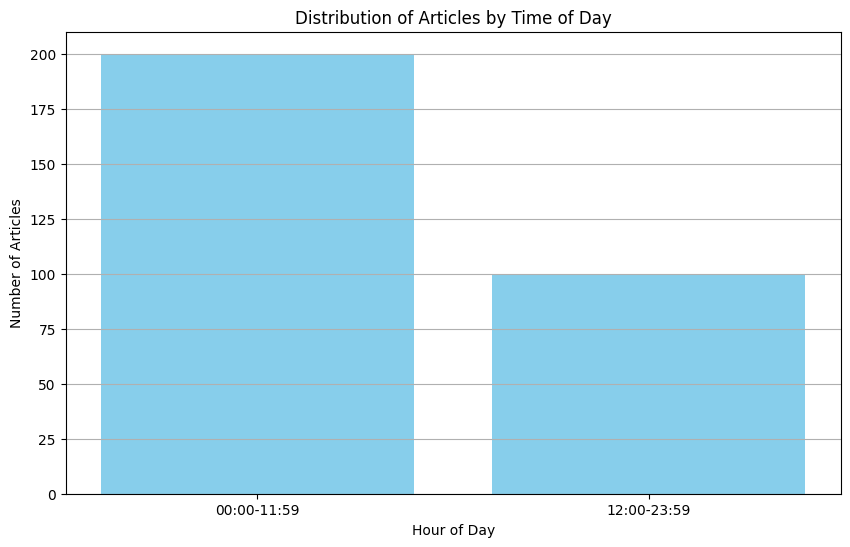

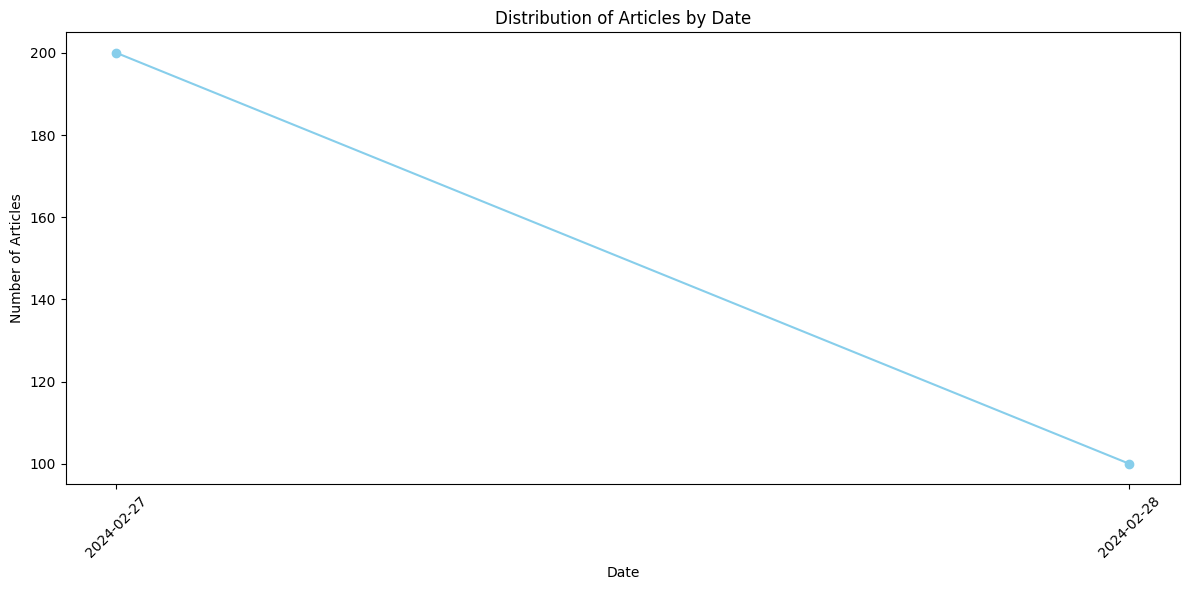

                  Date      Name  \
0  2024-02-27T00:00:00     Wired   
1  2024-02-27T00:00:00  BBC News   
2  2024-02-27T00:00:00  BBC News   
3  2024-02-27T00:00:00  BBC News   
4  2024-02-27T00:00:00  BBC News   

                                               Title  \
0  How the Pentagon Learned to Use Targeted Ads t...   
1   MoD pauses new Army housing plans after backlash   
2  Watch Scotland beat England from a different a...   
3  Climate change may explain rare dragonfly's sp...   
4  Alan Bates and sacked Post Office chairman app...   

                                            Abstract  
0  Meet the guy who taught US intelligence agenci...  
1  The move to house military personnel based on ...  
2  Watch a different view of Scotland's Calcutta ...  
3  Experts say rising temperatures may have encou...  
4  The sub-postmaster, whose story featured in an...  


In [6]:
api_key='0bd6a2cb38be48d69a501953ef7f8270'
window_size = 12
news_fetcher = NewsFetcher(api_key, window_size)
start_date = "2024-02-27"
end_date = "2024-02-28"
query = "your query here"

articles = news_fetcher.fetch_news(start_date, end_date, query)

news_fetcher.plot_articles_distribution_over_one_day()

news_fetcher.plot_articles_distribution_over_days(start_date, end_date)

df = news_fetcher.dict_to_df()
print(df.head())

news_fetcher.save_df('test Getting the news.pkl')

In [16]:
type(apple_reference.reference)

str

In [18]:
# Define your file and load DataFrame outside the try-except blocks
file = 'df simple - 1 janvier to 7 mars.pkl'
file = 'test Getting the news.pkl'
df = pd.read_pickle(file)

text_processor = TextProcessor(df)

text_processor.add_embedding_column()
print("Embedding column added.")

text_processor.add_ner_column('Apple')
print("NER column added.")

text_processor.add_cluster_column(30)
print("Cluster column added.")

#ref_apple = """Apple Inc. (formerly Apple Computer, Inc.) is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer software, and online services."""
text_processor.add_similar_column(apple_reference.reference)
print("Similar column added.")

text_processor.save_df()
print("DataFrame saved.") 

Embedding column added.


config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NER column added.


c:\Users\Francisco García\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Francisco García\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Francisco García\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Francisco García\AppData\Local\Programs\Pyt

Cluster column added.
Similar column added.
DataFrame saved.


In [12]:
file = 'df embedding and entity and cluster and similarity- 1 janvier to 7 mars'
df = pd.read_pickle(file)
news_analyzer = NewsAnalyzer(df)
#news_analyzer.plot_of_clusters()
news_analyzer.add_df_similar_embedding(0.6)
news_analyzer.add_df_similar_entity(0.5)

index_1 = news_analyzer.get_i_most_similar_embedding_index(0.6, 4)
index_2 = news_analyzer.get_i_most_similar_entity_index(0.5, 4)
index_1_2 = set(index_1).union(set(index_2))

start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 3, 1)
#news_analyzer.plot_cluster_evolution(index_1_2, start_date, end_date)

news = news_analyzer.most_important_news_embedding(
    0, '2024-02-27', '2024-02-28'
)
news_analyzer.summarize(news)

self.data_frames['df_similar'] {'0.6':            Date              Name  \
2    2023-12-31          Buzzfeed   
11   2023-12-31          BBC News   
15   2023-12-31          Buzzfeed   
20   2023-12-31          CBC News   
30   2023-12-31  Business Insider   
...         ...               ...   
8429 2024-03-07  Business Insider   
8434 2024-03-07  Business Insider   
8438 2024-03-07             Wired   
8442 2024-03-07          Engadget   
8460 2024-03-07    Breitbart News   

                                                  Title  \
2     34 Products For Anyone Who Self-Identifies As ...   
11    North Korea says it will launch three new spy ...   
15    Not To Toot My Own Horn, But I’ve Just Compile...   
20    Paula Abdul accuses American Idol producer Nig...   
30    The 'Effective Accelerationism' movement doesn...   
...                                                 ...   
8429  A startup says it's getting close to bringing ...   
8434  What do robotaxis see when a human cro